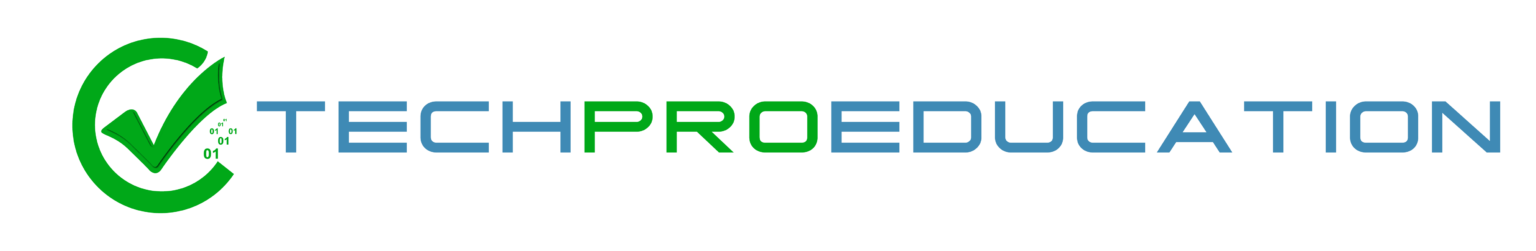

Please note that this notebook is created by Mert Urper for DS-6 Working Group in Techpro DataScience Bootcamp

In this project, we will analyze human resources data by performing data wrangling & EDA.

We will learn how to:

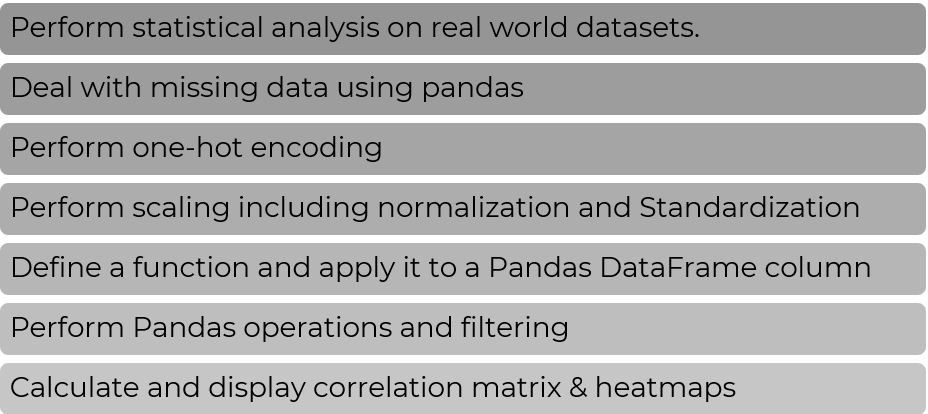

# CODING TASK #1. IMPORT DATASET AND PERFORM BASIC STATISTICAL DATA ANALYSIS

- **Import Pandas Library**

- **Force Pandas to display all rows and columns**

- **Let's read a CSV file using Pandas as follows**

- **Let's obtain the datatype**

- **you can view the first couple of rows using .head()**

- **you can view the last couple of rows using .tail()**

- **Calculate the average values for employee_df dataframe**
 
- **35 features in total**

- **Obtain a Statistical Summary about the data**

In [1]:
!pip install plotly
!pip install dash
!pip install wordcloud
!pip install cufflinks
!pip install missingno
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [2]:
#Importing the required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_hr = pd.read_csv("Human_Resources.csv")
df_hr.head()

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,5993.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,49,NaN,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,37,2090.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,33,2909.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,27,3468.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df_ky = pd.read_csv("kyphosis.csv")
df_ky.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [7]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   MonthlyIncome             1467 non-null   float64
 2   Attrition                 1470 non-null   object 
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1469 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1469 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EmployeeNumber            1469 non-null   float64
 11  EnvironmentSatisfaction   1470 non-null   int64  
 12  Gender                    1469 non-null   object 
 13  HourlyRate                1470 non-null   int64  
 14  JobInvol

In [8]:
df_ky.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [9]:
# Let's create a more detailed table for our features

# Create an empty list to store the output data
output_data = []

for col in df_hr.columns:
    
    # If the number of unique values in the column is less than or equal to 10
    if df_hr.loc[:, col].nunique() <= 10:
        # Get the unique values in the column
        unique_values = df_hr.loc[:, col].unique()
        # Append the column name, number of unique values, unique values, and data type to the output data
        output_data.append([col, df_hr.loc[:, col].nunique(), unique_values, df_hr.loc[:, col].dtype])
    else:
        # Otherwise, append only the column name, number of unique values, and data type to the output data
        output_data.append([col, df_hr.loc[:, col].nunique(), df_hr.loc[:, col].dtype])

output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

output_df

,Column Name,Number of Unique Values,Unique Values,Data Type
0,Age,43,int64,None
1,MonthlyIncome,1346,float64,None
2,Attrition,2,"[Yes, No]",object
3,BusinessTravel,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]",object
4,DailyRate,886,int64,None
5,Department,3,"[Sales, Research & Development, nan, Human Res...",object
6,DistanceFromHome,29,int64,None
7,Education,5,"[2, 1, 4, 3, 5]",int64
8,EducationField,6,"[Life Sciences, Other, Medical, nan, Marketing...",object
9,EmployeeCount,1,[1],int64


In [10]:
# Statistical Properties about the data
df_hr.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
MonthlyIncome,1467.0,6505.155419,4711.297846,1009.0,2911.00,4908.0,8378.00,19999.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1469.0,1025.556161,601.646166,1.0,492.00,1022.0,1556.00,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0


**PRACTICE OPPORTUNITY #1:**
- **Calculate the mean, maximum and minimum employee age considered in this study using a different strategy**

In [11]:
# first method
print(f" maximum age: {df_hr.Age.max()}\n minimum age: {df_hr.Age.min()}\n average age: {df_hr.Age.mean()}")

 maximum age: 60
 minimum age: 18
 average age: 36.923809523809524


In [12]:
# second method
age = df_hr["Age"].agg(["min","max","mean"])
age

min     18.00000
max     60.00000
mean    36.92381
Name: Age, dtype: float64

In [14]:
df_hr[["Age"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0


# CODING TASK #2. DEALING WITH MISSING DATA

- **Let's locate rows that have Null values**

- **Notice Row index 6 has many missing values**

- **Let's see the total number of missing elements per column**

- **Drop any row that contains a Null value** 

- **Note that the size of the dataframe has been reduced by 7 elements from 1470 to 1463**

- **Notice that row 1 for example is no longer existing!**

- **Let's check if we still have any missing values**

- **Let's explore an alternative (smarter) method to deal with missing values**

- **Let's read the raw data again using Pandas as follows**

- **Calculate the average monthly income**

- **You can use Fillna to fill a given column with a certain value**

In [17]:
# Let's locate rows that have Null values
df_hr[df_hr.isna().any(axis=1)]

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,NaN,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
6,59,NaN,No,Travel_Rarely,1324,Research & Development,3,3,NaN,1,...,1,80,3,12,3,2,1,0,0,0
7,30,2693.0,No,Travel_Rarely,1358,NaN,24,1,Life Sciences,1,...,2,80,1,1,2,3,1,0,0,0
17,22,2935.0,No,Non-Travel,1123,Research & Development,16,2,Medical,1,...,2,80,2,1,2,2,1,0,0,0
23,21,1232.0,No,Travel_Rarely,391,Research & Development,15,2,Life Sciences,1,...,4,80,0,0,6,3,0,0,0,0
103,34,4809.0,No,Travel_Rarely,665,Research & Development,6,4,Other,1,...,3,80,0,16,3,3,16,13,2,10
947,52,NaN,Yes,Travel_Rarely,1030,Sales,5,3,Life Sciences,1,...,3,80,0,10,2,2,8,7,7,7


In [18]:
# Let's see the total number of missing elements per column
df_hr.isnull().sum()

Age                         0
MonthlyIncome               3
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  1
DistanceFromHome            0
Education                   0
EducationField              1
EmployeeCount               0
EmployeeNumber              1
EnvironmentSatisfaction     0
Gender                      1
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     1
JobSatisfaction             0
MaritalStatus               1
MonthlyRate                 2
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           1
PerformanceRating           1
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [20]:
# let's just look at the missing features
df_hr.isna().sum()[df_hr.isna().sum() > 0] # Ahmet Jawid

MonthlyIncome        3
Department           1
EducationField       1
EmployeeNumber       1
Gender               1
JobRole              1
MaritalStatus        1
MonthlyRate          2
PercentSalaryHike    1
PerformanceRating    1
dtype: int64

In [22]:
# Drop any row that contains a Null value
df_hr.dropna(inplace = True)

In [24]:
# Let's check if we still have any missing values
df_hr[df_hr.isna().any(axis=1)]

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [25]:
df_hr["MonthlyIncome"].isnull().sum()

0

In [27]:
# fill in the missing lines with the average monthly income
df_hr["MonthlyIncome"].fillna(df_hr.MonthlyIncome.mean(), inplace = True)

**PRACTICE OPPORTUNITY #2:**
- **Calculate the median monthly rate. Use the calculated median values to fill out missing data. Confirm that the process is successful**

In [28]:
df_hr.MonthlyRate.median()

14242.0

In [29]:
# Let's use the calculated median values to fill in the missing data
df_hr["MonthlyRate"].fillna(df_hr.MonthlyRate.median(), inplace = True)

In [30]:
df_hr["MonthlyRate"].isnull().sum()

0

In [31]:
df_hr.dropna(inplace = True)

# CODING TASK #3: PERFORM ONE-HOT ENCODING [OPTIONAL]

- **Import the Human Resources data and remove all missing values**
- **How many unique categories exist in the Education Field column?**
- **Perform one hot encoding to the Education Field column**

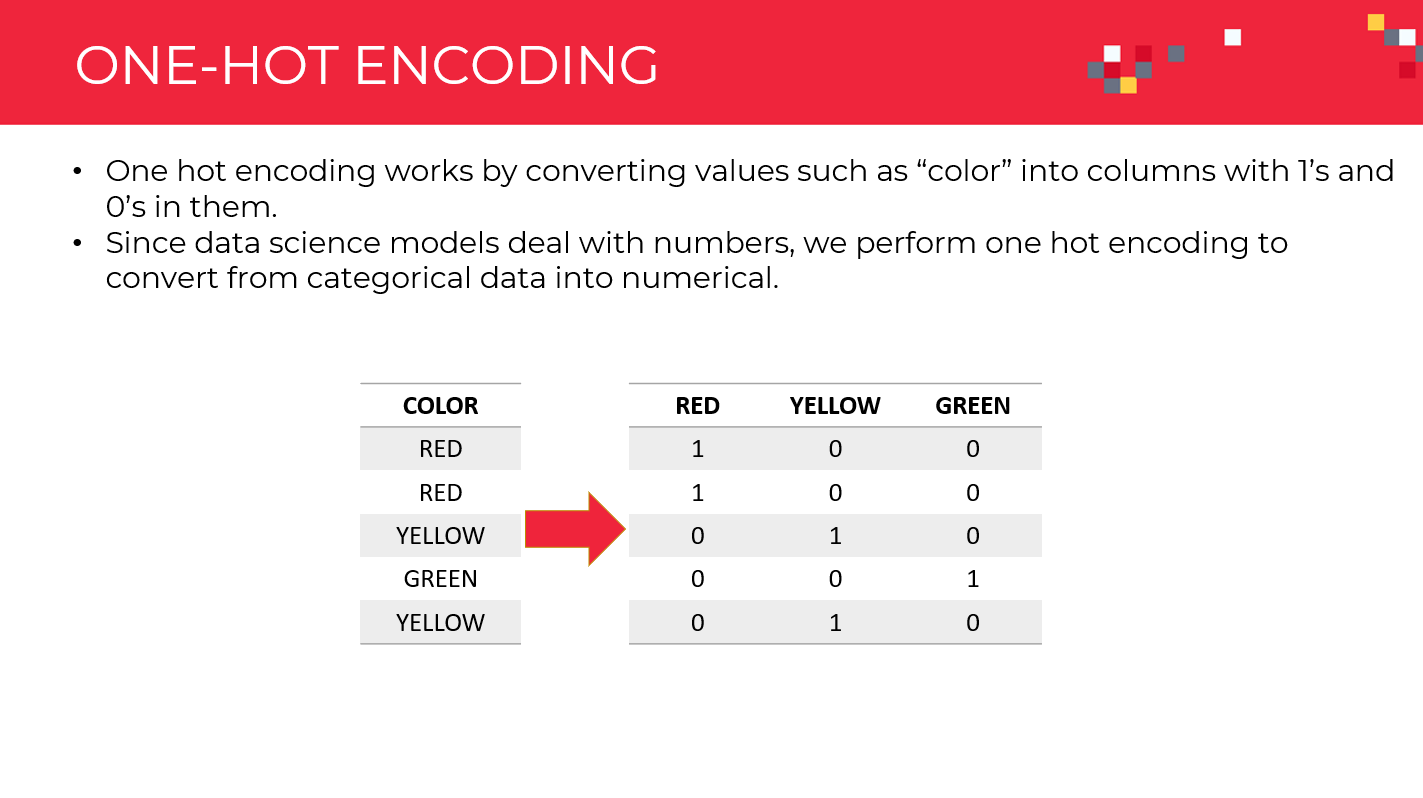

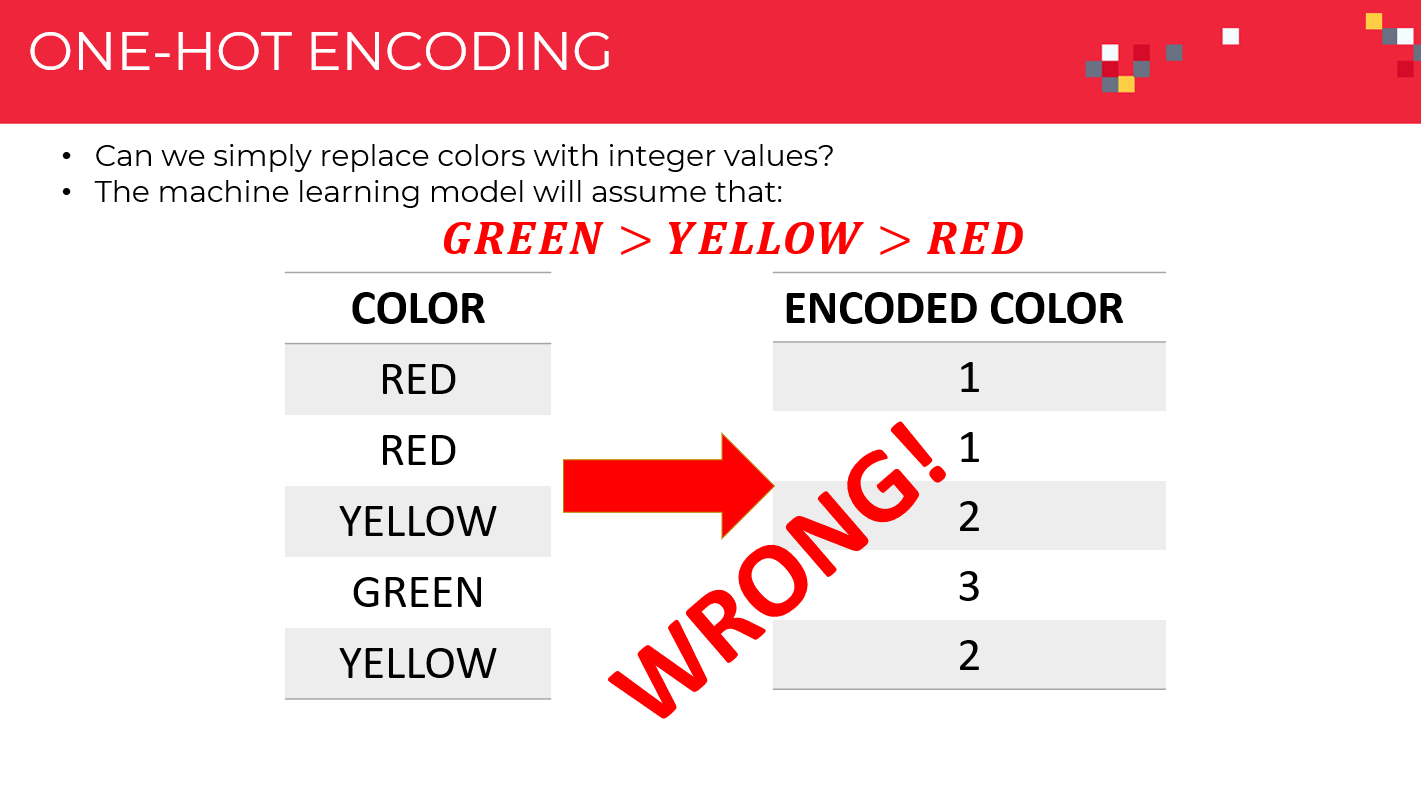

In [35]:
# Let's read a CSV file using Pandas as follows
#hr_df = pd.read_csv('Human_Resources.csv')
#hr_df

In [36]:
df_hr['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [37]:
df_hr['BusinessTravel']

0           Travel_Rarely
2           Travel_Rarely
3       Travel_Frequently
4           Travel_Rarely
5       Travel_Frequently
              ...        
1465    Travel_Frequently
1466        Travel_Rarely
1467        Travel_Rarely
1468    Travel_Frequently
1469        Travel_Rarely
Name: BusinessTravel, Length: 1463, dtype: object

In [39]:
BusinessTravel_Encoded = pd.get_dummies(df_hr['BusinessTravel'])
print(BusinessTravel_Encoded)

      Non-Travel  Travel_Frequently  Travel_Rarely
0              0                  0              1
2              0                  0              1
3              0                  1              0
4              0                  0              1
5              0                  1              0
...          ...                ...            ...
1465           0                  1              0
1466           0                  0              1
1467           0                  0              1
1468           0                  1              0
1469           0                  0              1

[1463 rows x 3 columns]


**PRACTICE OPPORTUNITY #3 [OPTIONAL]:**
- **Import the Human Resources data and remove all missing values**
- **How many unique categories exist in the Education Field column?**
- **Perform one hot encoding to the Education Field column**

In [40]:
df_hr_1 = pd.read_csv("Human_Resources.csv")
df_hr_1.head()

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,5993.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,49,NaN,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,37,2090.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,33,2909.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,27,3468.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [42]:
df_hr_1.dropna(inplace = True)

In [44]:
df_hr_1[df_hr_1.isna().any(axis=1)]

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [48]:
df_hr_1["EducationField"].nunique()

6

In [50]:
EducationField_Encoded = pd.get_dummies(df_hr['EducationField'])
EducationField_Encoded

,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
0,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0
5,0,1,0,0,0,0
...,...,...,...,...,...,...
1465,0,0,0,1,0,0
1466,0,0,0,1,0,0
1467,0,1,0,0,0,0
1468,0,0,0,1,0,0


# CODING TASK #4: PERFORM SCALING (NORMALIZATION & STANDARDIZATION) [OPTIONAL]

In [54]:
# Let's read a CSV file using Pandas as follows
df_hr_3 = pd.read_csv('Human_Resources.csv')
df_hr_3

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,5993.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,49,NaN,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,37,2090.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,33,2909.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,27,3468.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2571.0,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
1466,39,9991.0,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
1467,27,6142.0,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
1468,49,5390.0,No,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8


In [55]:
df_hr_3['Age'].values

array([41, 49, 37, ..., 27, 49, 34], dtype=int64)

In [56]:
# Normalization is conducted to make feature values range from 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_df_3['Age'] = scaler.fit_transform(df_df_3['Age'].values.reshape(-1,1))

In [57]:
df_df_3['Age']

0       0.547619
1       0.738095
2       0.452381
3       0.357143
4       0.214286
          ...   
1465    0.428571
1466    0.500000
1467    0.214286
1468    0.738095
1469    0.380952
Name: Age, Length: 1470, dtype: float64

In [58]:
df_hr_3.describe()

,Age,MonthlyIncome,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1467.000000,1470.000000,1470.000000,1470.000000,1470.0,1469.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,6505.155419,802.485714,9.192517,2.912925,1.0,1025.556161,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,4711.297846,403.509100,8.106864,1.024165,0.0,601.646166,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1009.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2911.000000,465.000000,2.000000,2.000000,1.0,492.000000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,4908.000000,802.000000,7.000000,3.000000,1.0,1022.000000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,8378.000000,1157.000000,14.000000,4.000000,1.0,1556.000000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,19999.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**PRACTICE OPPORTUNITY #4 [OPTIONAL]:**
- **Perform feature scaling by performing standardization (Recall that Standardization is conducted to transform the data to have a mean of zero and standard deviation of 1.**
- **Perform a sanity check to ensure that the transformation was successful**

# CODING TASK #5. PANDAS OPERATIONS/FILTERING

In [59]:
# Let's read a CSV file using Pandas as follows
df_hr_4 = pd.read_csv('Human_Resources.csv')

- **Pick certain rows that satisfy a certain criteria**

- **Pick certain rows that satisfy 2 or more critirea**

- **values that fall between a given range**

In [60]:
df_hr_4.TotalWorkingYears.value_counts()

10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
2      31
14     31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14
0      11
29     10
31      9
32      9
30      7
33      7
27      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalWorkingYears, dtype: int64

In [61]:
# Pull rows with Total Years of Employment greater than 25 
df_hr_4[df_hr_4.TotalWorkingYears >= 25]

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
18,53,15427.0,No,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,...,3,80,0,31,3,3,25,8,3,7
25,53,19094.0,No,Travel_Rarely,1282,Research & Development,5,3,Other,1,...,4,80,1,26,3,2,14,13,4,8
62,50,18740.0,No,Travel_Rarely,989,Research & Development,7,2,Medical,1,...,4,80,1,29,2,2,27,3,13,8
63,59,7637.0,No,Travel_Rarely,1435,Sales,25,3,Life Sciences,1,...,4,80,0,28,3,2,21,16,7,9
67,45,9724.0,No,Travel_Rarely,1339,Research & Development,7,3,Life Sciences,1,...,3,80,1,25,2,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,48,19665.0,No,Travel_Rarely,1224,Research & Development,10,3,Life Sciences,1,...,4,80,0,29,3,3,22,10,12,9
1374,58,17875.0,No,Travel_Rarely,605,Sales,21,3,Life Sciences,1,...,3,80,1,29,2,2,1,0,0,0
1377,49,19161.0,No,Travel_Frequently,1064,Research & Development,2,1,Life Sciences,1,...,4,80,0,28,3,3,5,4,4,3
1401,55,19636.0,No,Travel_Rarely,189,Human Resources,26,4,Human Resources,1,...,1,80,1,35,0,3,10,9,1,4


In [62]:
# Pull rows with a Total Years of Service greater than 25 and a gender of Female 
df_hr_4[(df_hr_4.TotalWorkingYears >= 25) & (df_hr_4.Gender == "Female")]

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
18,53,15427.0,No,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,...,3,80,0,31,3,3,25,8,3,7
25,53,19094.0,No,Travel_Rarely,1282,Research & Development,5,3,Other,1,...,4,80,1,26,3,2,14,13,4,8
62,50,18740.0,No,Travel_Rarely,989,Research & Development,7,2,Medical,1,...,4,80,1,29,2,2,27,3,13,8
63,59,7637.0,No,Travel_Rarely,1435,Sales,25,3,Life Sciences,1,...,4,80,0,28,3,2,21,16,7,9
105,59,18844.0,No,Non-Travel,1420,Human Resources,2,4,Human Resources,1,...,4,80,1,30,3,3,3,2,2,2
106,50,18172.0,No,Travel_Frequently,1115,Research & Development,1,3,Life Sciences,1,...,1,80,0,28,1,2,8,3,0,7
126,58,10312.0,Yes,Travel_Rarely,147,Research & Development,23,4,Medical,1,...,4,80,1,40,3,2,40,10,15,6
233,50,19517.0,No,Travel_Rarely,854,Sales,1,4,Medical,1,...,3,80,1,32,3,2,7,0,0,6
263,46,16872.0,No,Travel_Rarely,488,Sales,2,3,Technical Degree,1,...,2,80,1,28,2,2,7,7,7,7
316,49,13964.0,No,Travel_Rarely,1091,Research & Development,1,2,Technical Degree,1,...,4,80,0,25,2,3,7,1,0,7


In [63]:
# Let's retrieve values that fall between a certain range in total working years 
df_hr_4[(df_hr_4['TotalWorkingYears'] >= 35) & (df_hr_4['TotalWorkingYears'] <= 40)]

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
85,56,7260.0,No,Travel_Rarely,1400,Research & Development,7,3,Life Sciences,1,...,1,80,0,37,3,2,6,4,0,2
98,58,13872.0,No,Travel_Rarely,682,Sales,10,4,Medical,1,...,3,80,0,38,1,2,37,10,1,8
126,58,10312.0,Yes,Travel_Rarely,147,Research & Development,23,4,Medical,1,...,4,80,1,40,3,2,40,10,15,6
187,55,18722.0,No,Travel_Rarely,692,Research & Development,14,4,Medical,1,...,4,80,0,36,3,3,24,15,2,15
270,55,19045.0,No,Travel_Rarely,452,Research & Development,1,3,Medical,1,...,3,80,0,37,2,3,36,10,4,13
401,56,13212.0,No,Travel_Frequently,906,Sales,6,3,Life Sciences,1,...,4,80,3,36,0,2,7,7,7,7
445,55,16835.0,No,Travel_Rarely,1117,Sales,18,5,Life Sciences,1,...,4,80,0,37,2,3,10,9,7,7
595,58,19246.0,Yes,Travel_Rarely,286,Research & Development,2,4,Life Sciences,1,...,4,80,0,40,2,3,31,15,13,8
624,53,10934.0,No,Travel_Rarely,661,Sales,7,2,Marketing,1,...,4,80,1,35,3,3,5,2,0,4
894,54,17779.0,No,Travel_Rarely,685,Research & Development,3,3,Life Sciences,1,...,1,80,0,36,2,3,10,9,0,9


**PRACTICE OPPORTUNITY #5:**
- **Using "hr_df" DataFrame, leverage pandas operations to only select high DailyRate individuals (1450+)** 
- **What is the combined Daily Rate for all employees with 1450+?**

In [64]:
df_hr.head(2)

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,5993.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
2,37,2090.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0


In [67]:
df_1450 = df_hr[df_hr.DailyRate >= 1450]

In [69]:
df_1450.shape

(50, 35)

In [70]:
df_1450.DailyRate.mean()

1474.98

# CODING TASK #6: PERFORM BASIC EDA ON BOTH CLASSES

- **It makes sense to drop 'EmployeeCount', 'Standardhours' and 'Over18' since they do not change from one employee to the other**
- **Let's see how many employees left the company! Let's drop 'EmployeeNumber' as well**
- **Let's see how many employees left the company!**
- **View employees who left**

In [72]:
df_hr = pd.read_csv('Human_Resources.csv')

In [73]:
# Drop the 'EmployeeCount', 'Standardhours' and 'Over18' columns
df_hr.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis = 1, inplace = True)

In [74]:
df_hr.shape

(1470, 32)

In [75]:
df_hr["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [80]:
count_yes = df_hr[df_hr["Attrition"] == "Yes"].shape[0]

In [84]:
print(f"{count_yes} person left the company \n follow us for further investigation")

237 person left the company 
 follow us for further investigation


In [85]:
df_hr.drop(['EmployeeNumber'], axis = 1, inplace = True)

In [86]:
# Let's view the departing employees
df_yes = df_hr[df_hr.Attrition == "Yes"]
df_yes

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,5993.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,3.0,1,0,8,0,1,6,4,0,5
2,37,2090.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,3.0,2,0,7,3,3,0,0,0,0
14,28,2028.0,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,3,...,3.0,2,0,6,4,3,4,2,0,3
21,36,3407.0,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,3,...,4.0,2,0,10,4,3,5,3,0,3
24,34,2960.0,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,2,...,3.0,3,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,1790.0,Yes,Travel_Frequently,638,Sales,9,3,Marketing,4,...,3.0,1,1,1,3,2,1,0,1,0
1442,29,4787.0,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,1,...,3.0,2,3,4,3,4,2,2,2,2
1444,56,2339.0,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,4,...,3.0,4,1,14,4,1,10,9,9,8
1452,50,6728.0,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,2,...,3.0,4,2,12,3,3,6,3,0,1


**PRACTICE OPPORTUNITY #6:**
- **Filter the hr_df to only include the employees who stayed in the company**
- **Generate statistical summary for employees who stayed**
- **Compare both statistical summaries. What do you infer from the data?**

In [88]:
df_no = df_hr[df_hr["Attrition"] == "No"]
df_no

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,NaN,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4.0,4,1,10,3,3,10,7,1,7
3,33,2909.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3.0,3,0,8,3,3,8,7,3,0
4,27,3468.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,3.0,4,1,6,3,3,2,2,2,2
5,32,3068.0,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,...,3.0,3,0,8,2,2,7,7,3,6
6,59,NaN,No,Travel_Rarely,1324,Research & Development,3,3,NaN,3,...,NaN,1,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2571.0,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,...,3.0,3,1,17,3,3,5,2,0,3
1466,39,9991.0,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,...,3.0,1,1,9,5,3,7,7,1,7
1467,27,6142.0,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,...,4.0,2,1,6,0,3,6,2,0,3
1468,49,5390.0,No,Travel_Frequently,1023,Sales,2,3,Medical,4,...,3.0,4,0,17,3,2,9,6,0,8


In [89]:
df_no.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1233.0,37.561233,8.888360,18.0,31.0,36.0,43.0,60.0
MonthlyIncome,1231.0,6837.504468,4820.415800,1051.0,3211.5,5206.0,8835.5,19999.0
DailyRate,1233.0,812.504461,403.208379,102.0,477.0,817.0,1176.0,1499.0
DistanceFromHome,1233.0,8.915653,8.012633,1.0,2.0,7.0,13.0,29.0
Education,1233.0,2.927007,1.027002,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1233.0,2.771290,1.071132,1.0,2.0,3.0,4.0,4.0
HourlyRate,1233.0,65.952149,20.380754,30.0,48.0,66.0,83.0,100.0
JobInvolvement,1233.0,2.770479,0.692050,1.0,2.0,3.0,3.0,4.0
JobLevel,1233.0,2.145985,1.117933,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,1233.0,2.778589,1.093277,1.0,2.0,3.0,4.0,4.0


In [90]:
df_yes.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,237.0,33.607595,9.689350,18.0,28.0,32.0,39.0,58.0
MonthlyIncome,236.0,4771.588983,3640.097444,1009.0,2371.5,3187.0,5850.0,19859.0
DailyRate,237.0,750.362869,401.899519,103.0,408.0,699.0,1092.0,1496.0
DistanceFromHome,237.0,10.632911,8.452525,1.0,3.0,9.0,17.0,29.0
Education,237.0,2.839662,1.008244,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,237.0,2.464135,1.169791,1.0,1.0,3.0,4.0,4.0
HourlyRate,237.0,65.573840,20.099958,31.0,50.0,66.0,84.0,100.0
JobInvolvement,237.0,2.518987,0.773405,1.0,2.0,3.0,3.0,4.0
JobLevel,237.0,1.637131,0.940594,1.0,1.0,1.0,2.0,5.0
JobSatisfaction,237.0,2.468354,1.118058,1.0,1.0,3.0,3.0,4.0


From the information above:

1- The level of job satisfaction is lower among separated employees

2- Monthly income is lower for employees who quit their jobs

3- Total years of employment is lower for employees who quit

4- Job level is lower for employees who quit

As can be seen, there are many cause and effect relationships for employees who leave their jobs

# CODING TASK #7. PANDAS WITH FUNCTIONS

In [92]:
# Let's read a CSV file using Pandas as follows
df_hr = pd.read_csv('Human_Resources.csv')
hr_df

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,5993.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,49,NaN,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,37,2090.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,33,2909.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,27,3468.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2571.0,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
1466,39,9991.0,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
1467,27,6142.0,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
1468,49,5390.0,No,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8


- **Let's assume the daily rate has increased by 10%**
- **Define a function that increases all clients networth by a fixed value of 10% (for simplicity sake)**
- **assume that net worth increased by 10%**
- **You can apply a function to the DataFrame**

In [93]:
df_hr.DailyRate = df_hr.DailyRate * 1.1

In [94]:
def New_DailyRate(x):
    New_DailyRate = x * 1.1
    return New_DailyRate

New_DailyRate(df_hr["DailyRate"])

0       1333.42
1        337.59
2       1661.33
3       1684.32
4        715.11
         ...   
1465    1069.64
1466     741.73
1467     187.55
1468    1237.83
1469     759.88
Name: DailyRate, Length: 1470, dtype: float64

**PRACTICE OPPORTUNITY #7:**
- **Define a function that doubles the DailyRate and adds $100**
- **Apply the function to the DataFrame**
- **Calculate the updated total Daily Rate of all employees combined**

In [96]:
def New2_DailyRate(x):
    New_DailyRate = x*2 + 100
    return New_DailyRate

df_hr["DailyRate"] = New2_DailyRate(df_hr["DailyRate"])
df_hr["DailyRate"]

0       2524.4
1        713.8
2       3120.6
3       3162.4
4       1400.2
         ...  
1465    2044.8
1466    1448.6
1467     441.0
1468    2350.6
1469    1481.6
Name: DailyRate, Length: 1470, dtype: float64

# CODING TASK #8: HISTOGRAM AND CORRELATION

- **Several features such as 'MonthlyIncome' and 'TotalWorkingYears' are tail heavy**
- **Job level is strongly correlated with total working hours**
- **Monthly income is strongly correlated with Job level**
- **Monthly income is strongly correlated with total working hours**
- **Age is strongly correlated with monthly income**

In [97]:
# Let's fetch columns with unique values greater than 40 and look at their distribution
df_con = ["MonthlyIncome","TotalWorkingYears"]
df_con

['MonthlyIncome', 'TotalWorkingYears']

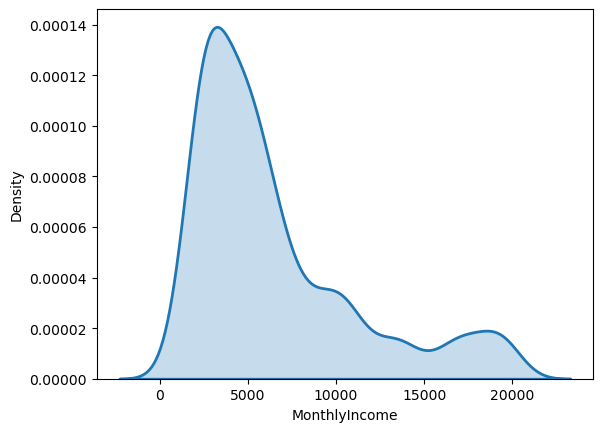

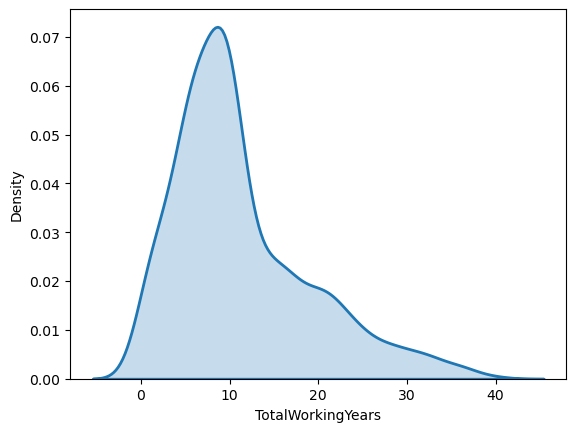

In [98]:
for i in df_con:
    sns.kdeplot(data = df_hr, x = i, fill = True, linewidth = 2)
    plt.show()

In [100]:
df_hr.corr()

,Age,MonthlyIncome,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.500915,0.010661,-0.001686,0.208034,NaN,-0.007392,0.010146,0.024287,0.029820,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
MonthlyIncome,0.500915,1.000000,0.008020,-0.017333,0.094755,NaN,-0.016276,-0.005885,-0.015412,-0.014619,...,0.025200,NaN,0.007174,0.773216,-0.021455,0.030490,0.514168,0.363535,0.344548,0.343788
DailyRate,0.010661,0.008020,1.000000,-0.004985,-0.016806,NaN,-0.049582,0.018355,0.023381,0.046135,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.017333,-0.004985,1.000000,0.021042,NaN,0.032077,-0.016075,0.031131,0.008783,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,0.094755,-0.016806,0.021042,1.000000,NaN,0.042209,-0.027128,0.016775,0.042438,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.007392,-0.016276,-0.049582,0.032077,0.042209,NaN,1.000000,0.017931,0.036074,-0.004848,...,-0.071811,NaN,0.065413,-0.014273,0.023805,0.009084,-0.012383,-0.009771,-0.009810,-0.010539
EnvironmentSatisfaction,0.010146,-0.005885,0.018355,-0.016075,-0.027128,NaN,0.017931,1.000000,-0.049857,-0.008278,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.015412,0.023381,0.031131,0.016775,NaN,0.036074,-0.049857,1.000000,0.042861,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.014619,0.046135,0.008783,0.042438,NaN,-0.004848,-0.008278,0.042861,1.000000,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


**PRACTICE OPPORTUNITY #8:**
- **Change the color of the heatmap [External Research is Required]**

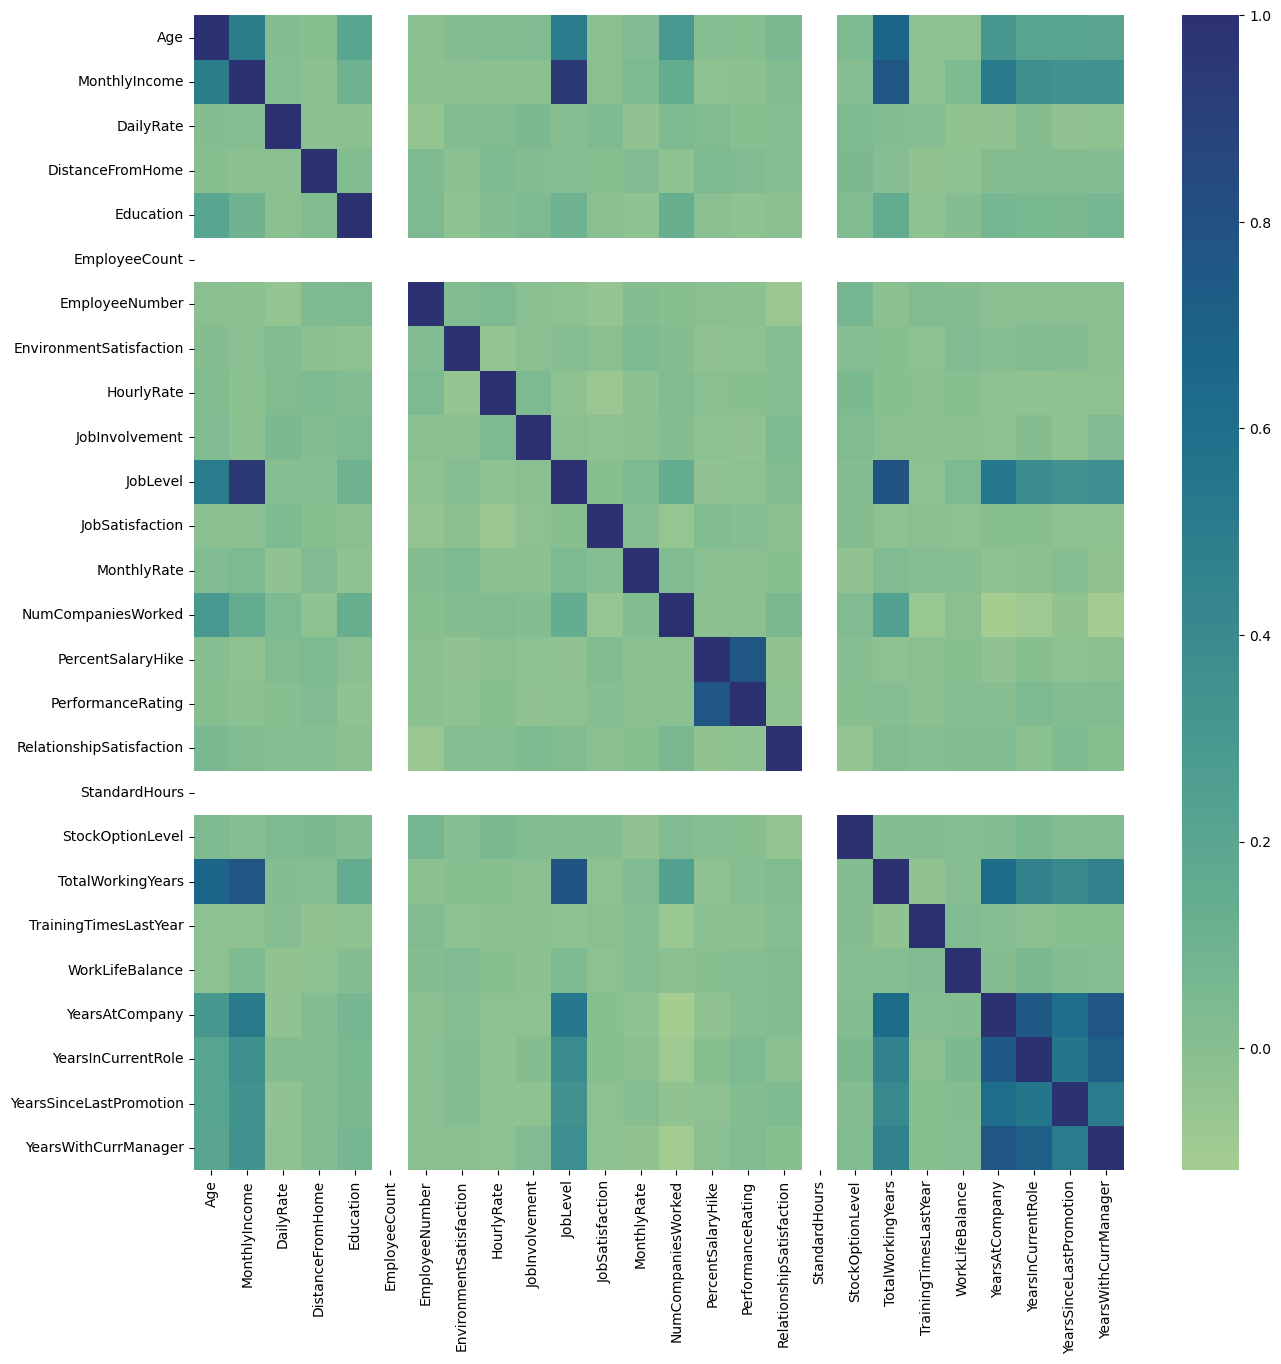

In [102]:
plt.figure(figsize=(15,15))
sns.heatmap(df_hr.corr(),cmap="crest");

# EXCELLENT JOB!

# FINAL CAPSTONE PROJECT OVERVIEW

- In this project, we will perform basic Exploratory Data Analysis (EDA) on the Kyphosis disease Dataset. 
- Kyphosis is an abnormally excessive convex curvature of the spine. 
- Dataset contains 81 rows and 4 columns representing data on children who have had corrective spinal surgery. 
    - INPUTS: 1. Age: in months, 2. Number: the number of vertebrae involved, 3. Start: the number of the first (topmost) vertebra operated on.
    - OUTPUTS: Kyphosis which represents a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.
- Using the “kyphosis.csv" included in the course package, write a python script to perform the following tasks:
    1. Import the “kyphosis.csv" file using Pandas
    2. Perform basic Exploratory Data Analysis (EDA) on the data       
    3. List the average, minimum and maximum age (in years) considered in this study using 2 methods
    4. Plot the correlation matrix 
    5. Convert the age column datatype from int64 to float64
    6. Define a function that converts age from months to years 
    7. Apply the function to the “Age” column and add the results into a new column entitled “Age in Years” 
    8. What are the features of the oldest and youngest child in this study?
    9. Scale the raw Age column (in months) using both standardization and Normalization. Perform a sanity check.    
    10. Normalization is conducted on the 'Age' column to make feature values range from 0 to 1.

In [103]:
df = pd.read_csv("kyphosis.csv")
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


### INPUTS:
**Age:** in months

**Number:** the number of vertebrae involved

**Start:** the number of the first (topmost) vertebra operated on

### OUTPUTS: 
**Kyphosis** which represents a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [105]:
df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [106]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,81.0,83.654321,58.104251,1.0,26.0,87.0,130.0,206.0
Number,81.0,4.049383,1.619423,2.0,3.0,4.0,5.0,10.0
Start,81.0,11.493827,4.883962,1.0,9.0,13.0,16.0,18.0


In [107]:
df.Kyphosis.value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

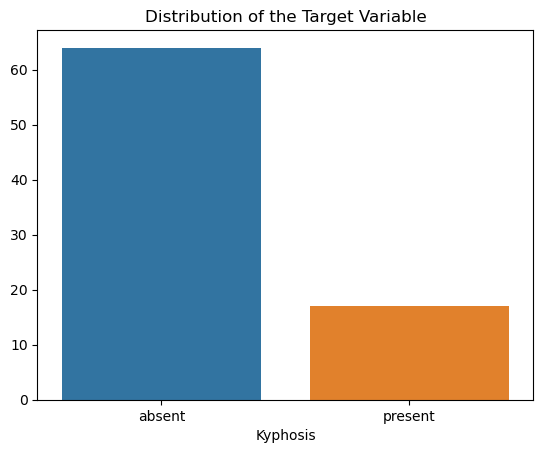

In [108]:
sns.barplot(x = df.Kyphosis.value_counts().index, y = df.Kyphosis.value_counts().values)
plt.title("Distribution of the Target Variable")
plt.xlabel("Kyphosis")
plt.show()

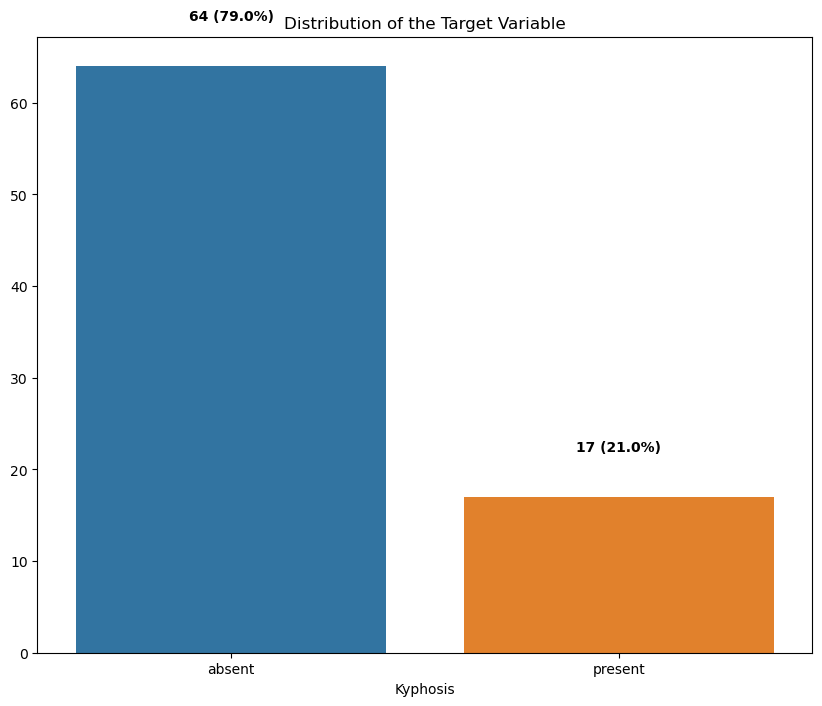

In [112]:
plt.figure(figsize=(10,8))

# Get the value counts of the Kyphosis column
value_counts = df.Kyphosis.value_counts()

# Calculate the percentage of each category
percentages = value_counts / value_counts.sum() * 100

# Create the bar plot
ax = sns.barplot(x=value_counts.index, y=value_counts.values)

# Add percentages and value numbers on top of the bars
for i, v in enumerate(value_counts.values):
    ax.text(i, v + 5, f"{v} ({percentages[i]:.1f}%)", ha='center', fontweight='bold')

# Set the title and labels
plt.title("Distribution of the Target Variable")
plt.xlabel("Kyphosis")

# Show the plot
plt.show()

In [113]:
df_con = ['Age', 'Number', 'Start'] 

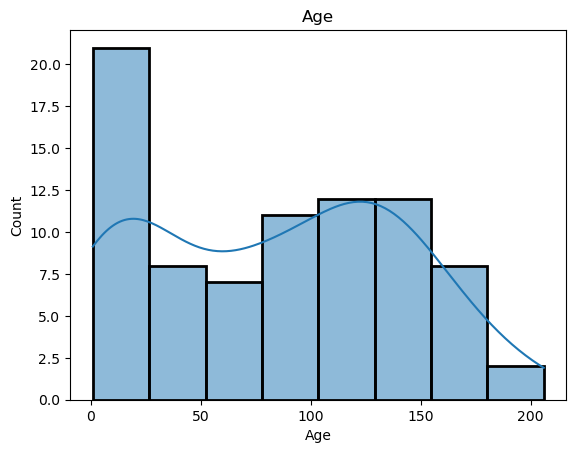

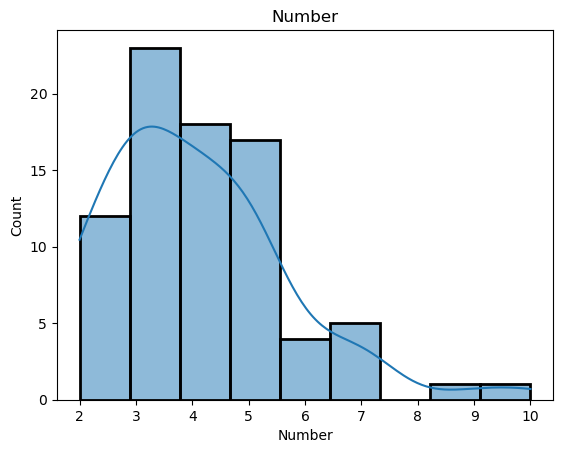

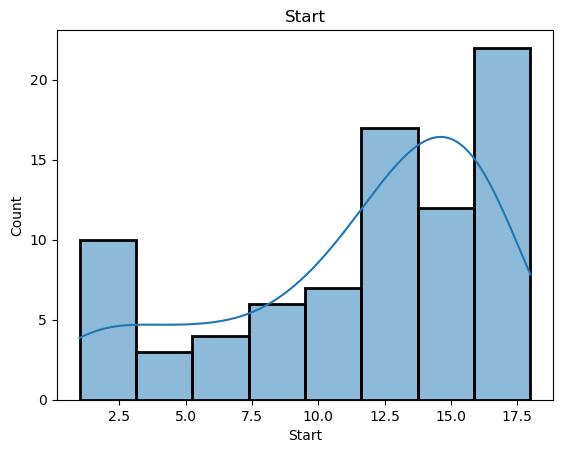

In [114]:
for i in df_con:
    sns.histplot(data = df, x = i, fill = True, linewidth = 2, kde = True)
    plt.title(i)
    plt.show()

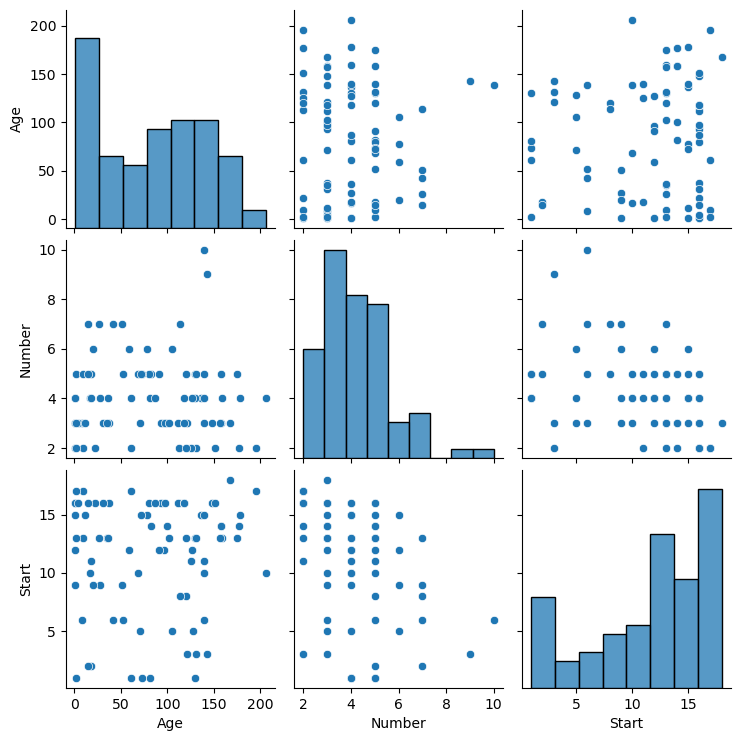

In [115]:
sns.pairplot(df);

In [116]:
print(f" maximum age: {df.Age.max()//12}\n minimum age: {df.Age.min()//12}\n average age: {df.Age.mean()//12}")

 maximum age: 17
 minimum age: 0
 average age: 6.0


In [117]:
age = df["Age"].agg(["min","max","mean"]) // 12
age

min      0.0
max     17.0
mean     6.0
Name: Age, dtype: float64

In [118]:
df.Age.describe() // 12 

count     6.0
mean      6.0
std       4.0
min       0.0
25%       2.0
50%       7.0
75%      10.0
max      17.0
Name: Age, dtype: float64

In [119]:
# Let's draw the correlation matrix
df.corr()

,Age,Number,Start
Age,1.000000,-0.016687,0.057828
Number,-0.016687,1.000000,-0.425099
Start,0.057828,-0.425099,1.000000


In [120]:
df[df.Age == df.Age.max()]

,Kyphosis,Age,Number,Start
73,absent,206,4,10


In [121]:
df[df.Age == df.Age.min()]

,Kyphosis,Age,Number,Start
4,absent,1,4,15
5,absent,1,2,16
13,absent,1,4,12
15,absent,1,3,16
36,absent,1,3,9


In [122]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalization = scaler.fit_transform(df['Age'].values.reshape(-1,1))
normalization[:10]

array([[0.34146341],
       [0.76585366],
       [0.6195122 ],
       [0.00487805],
       [0.        ],
       [0.        ],
       [0.29268293],
       [0.17560976],
       [0.54634146],
       [0.28292683]])

In [123]:
# STANDARDIZATION
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df['Age'].values.reshape(-1,1))
scaled[:10]

array([[-0.21914343],
       [ 1.28749437],
       [ 0.7679641 ],
       [-1.41406306],
       [-1.43138074],
       [-1.43138074],
       [-0.39232019],
       [-0.80794441],
       [ 0.50819896],
       [-0.42695554]])

# Great Job!